# Import modules

In [1]:
!pip install typing-extensions --quiet
!pip install wheel --quiet

# !pip install mlflow --quiet
# !pip install pyngrok --quiet

!pip install wandb==0.12.10 --quiet
# !pip install -q wandb --quiet
# !wandb disabled

!pip install yolov5 --quiet
# !pip install --ignore-installed Pillow==9.0.0

     |████████████████████████████████| 1.7 MB 28.8 MB/s 
     |████████████████████████████████| 181 kB 55.3 MB/s 
     |████████████████████████████████| 145 kB 52.1 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 853 kB 38.1 MB/s 
     |████████████████████████████████| 81 kB 10.4 MB/s 
     |████████████████████████████████| 596 kB 73.2 MB/s 
     |████████████████████████████████| 87 kB 8.2 MB/s 
     |████████████████████████████████| 132 kB 69.2 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 8.9 MB 54.6 MB/s 
     |████████████████████████████████| 138 kB 66.4 MB/s 
     |████████████████████████████████| 127 kB 78.0 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 3.1 MB 51.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the pac

In [2]:
import torch
import os

import cv2
from google.colab.patches import cv2_imshow
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import h5py
import yaml
from random import shuffle


# import mlflow
# import mlflow.sklearn
# import mlflow.pytorch
# from mlflow import log_metric, log_param, log_artifacts
# from mlflow.tracking import MlflowClient
# from pyngrok import ngrok

import wandb

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


print('torch: ',torch.__version__)
print()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Working on device: {device}')
print()

if device.type == 'cuda':
  print(torch.cuda.get_device_name(torch.cuda.current_device()))
  
torch.set_printoptions(linewidth=120)

torch:  1.11.0+cu113

Working on device: cuda

Tesla T4


In [3]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Preparing Dataset

## Download image data from Bing

In [ ]:
!git clone https://github.com/ostrolucky/Bulk-Bing-Image-downloader.git

Cloning into 'Bulk-Bing-Image-downloader'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 188 (delta 4), reused 7 (delta 2), pack-reused 178
Receiving objects: 100% (188/188), 49.58 KiB | 957.00 KiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader')
!pwd

/content/Bulk-Bing-Image-downloader


In [ ]:
!ls

bbid.py  LICENSE  README.md


In [ ]:
animals_name_dict = {
                        'Sikorka_bogatka' : 'Parus major', #0
                        'Wrobel_domowy' : 'Passer domesticus', #1
                        'Rudzik' : 'Erithacus rubecula', # 2
                        'Dzwoniec' : 'Chloris chloris', # 3
                        'Dzieciol_duzy' : 'Dendrocopos major', # 4
                        'Kwiczol' : 'Turdus pilaris', # 5
                        'Sierpowka' : 'Streptopelia decaocto', # 6
                        'Kos' : 'Turdus merula', # 7
                        'Szpak' : 'Sturnus vulgaris', #8
                        'Raniuszek' : 'Aegithalos caudatus', #9
                        'sroka' : 'Eurasian Magpie', #10
                        'kawka' : 'Corvus monedula', # 11
                        'wilga_zwyczajna' : 'Oriolus oriolus', # 12
                        'dzik' : 'Sus scrofa', # 13
                        'wiewiorka' : 'Sciurus vulgaris', # 14
                        'sarna' : 'Capreolus capreolus', #15
                        'jelen_szlachetny' : 'Cervus elaphus', # 16
                        'sojka' : 'Garrulus glandarius', # 17
                        'wilk' : 'Canis lupus', # 18
                        'gil' :'Eurasian bullfinch',
                        'borsuk' : 'European Badger',
                        'lis' : 'european fox',
                    
                        }

animals_name_dict.values()

dict_values(['Parus major', 'Passer domesticus', 'Erithacus rubecula', 'Chloris chloris', 'Dendrocopos major', 'Turdus pilaris', 'Streptopelia decaocto', 'Turdus merula', 'Sturnus vulgaris', 'Aegithalos caudatus', 'Eurasian Magpie', 'Corvus monedula', 'Oriolus oriolus', 'Sus scrofa', 'Sciurus vulgaris', 'Capreolus capreolus', 'Cervus elaphus', 'Garrulus glandarius', 'Canis lupus'])

In [ ]:
class_names = list( animals_name_dict.keys() )
class_names

['Sikorka_bogatka',
 'Wrobel_domowy',
 'Rudzik',
 'Dzwoniec',
 'Dzieciol_duzy',
 'Kwiczol',
 'Sierpowka',
 'Kos',
 'Szpak',
 'Raniuszek',
 'sroka',
 'kawka',
 'wilga_zwyczajna',
 'dzik',
 'wiewiorka',
 'sarna',
 'jelen_szlachetny',
 'sojka',
 'wilk']

In [ ]:
os.mkdir('animal_data')

In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader/animal_data')
!pwd

In [ ]:
%%time
! /content/Bulk-Bing-Image-downloader/bbid.py -s 'european hare' -o 'zajac' --limit 50 --filters +filterui:age-lt525600

FAIL: european hare.jpeg
SKIP: Already downloaded maxresdefault-17.jpg, not saving
SKIP: Already downloaded 18cbca43a3a757c313795dee5a2d28f5.jpg, not saving
SKIP: Already downloaded 712d41a084ebaebae70ab94d20a76711--ph.jpg, not saving
SKIP: Already downloaded bf435d12349df18758931c3f36efbe8d.jpg, not saving
SKIP: Already downloaded 37c9d79b018e8e877ff13607302c4bad.jpg, not saving
SKIP: Already downloaded d0dbd2dccac9a470065a8886a92a11e8.jpg, not saving
SKIP: Already downloaded c61b777c1a608c7019a15fd6a5dd6567.jpg, not saving
FAIL: Lepus_europaeus_(Causse_Méjean%2C_Lo.jpg
SKIP: Already downloaded c11073971d81f859cbb5a0c0c0a09ee3.jpg, not saving
SKIP: Already downloaded f715c44c1d3c6db4bd7dccbe66d95bfd.jpg, not saving
SKIP: Already downloaded 17dcf1ebbdf4a17474862f6a11a7179a--po.jpg, not saving
SKIP: Already downloaded a8720b4426ac8f8eefb5969a553330b6.jpg, not saving
SKIP: Already downloaded 2ebc71a27fa104f9f3b07a6022265b41.jpg, not saving
SKIP: Already downloaded 2b805efef959ce074eae30c

In [ ]:
# %%time
# for i, animal_name in enumerate( animals_name_dict.items() ):
#     pol_name, lat_name = animal_name
#     print(f'i, pol_name: {pol_name}, lat_name: {lat_name}')
#     ! /content/Bulk-Bing-Image-downloader/bbid.py -s '$lat_name' -o '$pol_name' --limit 500 --filters +filterui:age-lt525600
  

### Count images

In [ ]:
def count_images(path_folder):

  class_names = os.listdir(path_folder)
  for no, cls_name in enumerate(class_names):
    
      path_to_class = os.path.join(path_folder, cls_name)
      imgs_count = os.listdir(path_to_class)
      
      print(f'class name: {cls_name} {len(imgs_count)} images')


In [ ]:
path_folder = '/content/Bulk-Bing-Image-downloader/animal_data/'

count_images(path_folder)

### Change file names

In [ ]:
%%time

change_img_names('/content/Bulk-Bing-Image-downloader/animal_data')

CPU times: user 121 ms, sys: 496 ms, total: 617 ms
Wall time: 632 ms


### Delete none type data

In [ ]:
class_names = os.listdir('/content/Bulk-Bing-Image-downloader/animal_data')

for no, cls_name in enumerate(class_names):
  path_to_class = os.path.join(path_folder, cls_name)
  classes_list = os.listdir(path_to_class)
  for i, img in enumerate(classes_list):
    path_to_img = os.path.join(path_to_class, img) 
    
    image = cv2.imread( path_to_img )
    if image is None:
      # print(f'{path_to_img} - {type(image)}')
      os.remove(path_to_img)
      print(f'Delete {cls_name} type: {type(image)}')


Delete kawka type: <class 'NoneType'>
Delete sojka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete dzik type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete Sikorka_bogatka type: <class 'NoneType'>
Delete Rudzik type: <class 'NoneType'>

### Resize images

In [ ]:
def resize_images(path_folder):
    class_names = os.listdir(path_folder)
    
    height = 640
 
    for no, cls_name in enumerate(class_names):
        path_to_class = os.path.join(path_folder, cls_name)
        classes_list = os.listdir(path_to_class)
        
        for i, img in enumerate(classes_list):
          path_to_img = os.path.join(path_to_class, img)
          image = cv2.imread( path_to_img )

          h, w = image.shape[:2]

          # Calculating the ratio
          ratio = height / w
            
          # Creating a tuple containing width and height
          dim = (height, int(h * ratio))

          resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
          cv2.imwrite(path_to_img, resized_img)

In [ ]:
resize_images(path_folder)

(426, 640, 3)


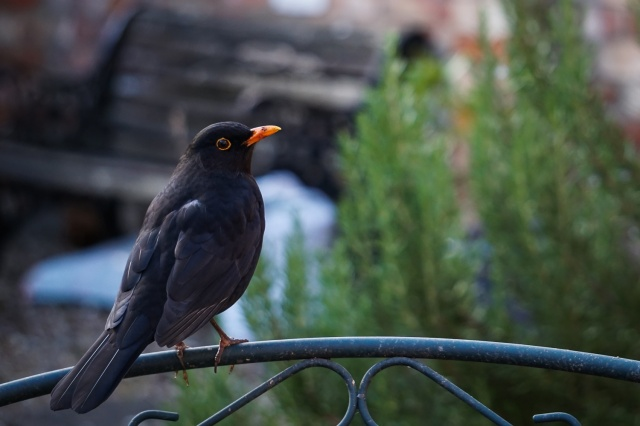

In [ ]:
img = cv2.imread('/content/Bulk-Bing-Image-downloader/animal_data/Kos/Kos28.jpg')
print(img.shape)
cv2_imshow(img)

### Create zip file

In [ ]:
os.chdir('/content')
!pwd

/content


In [ ]:
%%time

dir_name = '/content/Bulk-Bing-Image-downloader/animal_data'
output_filename = 'animal_dataset'

shutil.make_archive(output_filename, 'zip', dir_name)

### Labeling data

In [ ]:
# https://www.makesense.ai/

# Preparing data for YOLO

## Unpacking dataset

In [ ]:
def unpack_archive(archfile, target_dir):
  shutil.unpack_archive(
                        filename=archfile,
                        extract_dir=target_dir,
                        format='zip')

In [ ]:
# the archive file

animal_detection_project_path = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection'
dataset = 'animal_dataset_258.zip'

dataset_zip_file = os.path.join(animal_detection_project_path, dataset )


dataset_dir = "/content"

unpack_archive(archfile=dataset_zip_file, target_dir=dataset_dir)

## Count images

In [ ]:
dataset_base_dir = "/content/animal_dataset_258"

animal_images = os.path.join(dataset_base_dir, 'images' )
labels = os.path.join(dataset_base_dir, 'labels' )


count_images(animal_images)

class name: Kwiczol 258 images
class name: Szpak 258 images
class name: sroka 258 images
class name: Dzwoniec 258 images
class name: Dzieciol_duzy 258 images
class name: Sikorka_bogatka 258 images
class name: kawka 258 images
class name: sarna 258 images
class name: wilk 258 images
class name: wiewiorka 258 images
class name: Wrobel_domowy 258 images
class name: lis 258 images
class name: gil 258 images
class name: jelen_szlachetny 258 images
class name: Raniuszek 258 images
class name: Sierpowka 258 images
class name: sojka 258 images
class name: Rudzik 258 images
class name: dzik 258 images
class name: Kos 258 images
class name: borsuk 258 images


In [ ]:
print(animal_images)
print(labels)
# print(labels_path)

/content/animal_dataset_258/images
/content/animal_dataset_258/labels


In [ ]:
for dir in glob( animal_images):
  print(dir)

print()
os.listdir(dir)

/content/animal_dataset_258/images



['Kwiczol',
 'Szpak',
 'sroka',
 'Dzwoniec',
 'Dzieciol_duzy',
 'Sikorka_bogatka',
 'kawka',
 'sarna',
 'wilk',
 'wiewiorka',
 'Wrobel_domowy',
 'lis',
 'gil',
 'jelen_szlachetny',
 'Raniuszek',
 'Sierpowka',
 'sojka',
 'Rudzik',
 'dzik',
 'Kos',
 'borsuk']

In [ ]:
len( os.listdir( animal_images ))

21

In [ ]:
print( labels )
print( animal_images )

/content/animal_dataset_258/labels
/content/animal_dataset_258/images


In [ ]:
imgs_count = len( glob(os.path.join( animal_images, "*", "*.jpg" )))
labels_count = len( glob(os.path.join( labels, "*", "*.txt" )))

print( imgs_count )
print( labels_count)

5418
5418


In [ ]:
def upload_dataset_to_wandb(path_to_folder, artifacts_name):
  
  data_artifacts = wandb.Artifact(artifacts_name, type="raw_dataset")
  # -----------------------------------------------------------
  for dir in os.listdir( path_to_folder):
    dir_path = os.path.join(path_to_folder, dir)
    if os.path.isdir(dir_path):
      data_generator = os.walk( dir_path )
      next(data_generator)
      for path, dir, files in data_generator:
        # print(f"PATH: {path}, NAME: {path.rsplit('/', 2)[-2]}/{path.rsplit('/', 1)[-1]}/{len(img)}")
        for img in files:
          path_to_img = os.path.join(path, img)
          data_artifacts.add_file(path_to_img, name=path.rsplit('/', 2)[-2] + "/" + path.rsplit('/', 1)[-1] + "/" + img)
  run.log_artifact(data_artifacts)       

In [ ]:
upload_dataset_to_wandb(dataset_base_dir, artifacts_name='data_artifacts_name' )

PATH: /content/animal_dataset_258/images/Kwiczol, NAME: images/Kwiczol/258
PATH: /content/animal_dataset_258/images/Szpak, NAME: images/Szpak/258
PATH: /content/animal_dataset_258/images/sroka, NAME: images/sroka/258
PATH: /content/animal_dataset_258/images/Dzwoniec, NAME: images/Dzwoniec/258
PATH: /content/animal_dataset_258/images/Dzieciol_duzy, NAME: images/Dzieciol_duzy/258
PATH: /content/animal_dataset_258/images/Sikorka_bogatka, NAME: images/Sikorka_bogatka/258
PATH: /content/animal_dataset_258/images/kawka, NAME: images/kawka/258
PATH: /content/animal_dataset_258/images/sarna, NAME: images/sarna/258
PATH: /content/animal_dataset_258/images/wilk, NAME: images/wilk/258
PATH: /content/animal_dataset_258/images/wiewiorka, NAME: images/wiewiorka/258
PATH: /content/animal_dataset_258/images/Wrobel_domowy, NAME: images/Wrobel_domowy/258
PATH: /content/animal_dataset_258/images/lis, NAME: images/lis/258
PATH: /content/animal_dataset_258/images/gil, NAME: images/gil/258
PATH: /content/an

In [ ]:
# # create a run in W&B
run = wandb.init(project="AnimalsDetection_YoloV5", job_type="upload", settings=wandb.Settings(start_method="thread") )
data_artifacts_name = "_".join(["animal_dataset", str(imgs_count)])

with run:
  upload_dataset_to_wandb(dataset_base_dir, artifacts_name=data_artifacts_name )

wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
run = wandb.init(project="AnimalsDetection_YoloV5", job_type="data_split", settings=wandb.Settings(start_method="thread"))

imgs_count =5418

data_artifacts_name = f"animal_dataset_{str(imgs_count)}"

with run:
  data_at = run.use_artifact(data_artifacts_name + ":latest")
  dataset = data_at.download()

wandb: Currently logged in as: armind93 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: Downloading large artifact animal_dataset_5418:latest, 585.07MB. 10836 files... Done. 0:0:0


In [ ]:
animal_images = os.path.join(dataset, 'images' )
labels = os.path.join(dataset, 'labels' )

print( animal_images )
print( labels )

./artifacts/animal_dataset_5418:v0/images
./artifacts/animal_dataset_5418:v0/labels


In [ ]:
images_list = []
labels_list = []


# for dir in os.listdir(dataset):
#   if os.path.isdir(dir):
for cls_name in os.listdir( animal_images ):
  lbl_list = os.listdir( os.path.join(labels, cls_name) )
  imgs_list = os.listdir( os.path.join(animal_images, cls_name) )

  for label, images in zip(lbl_list , imgs_list ):
    labels_list.append(label)
    images_list.append(images)

      
images_list.sort()
labels_list.sort()

    
print(f'images: {len(images_list )} | annotations: {len(labels_list  )}')   # 0.2, 0.015
print()
train_images, val_images, train_annotations, val_annotations = train_test_split(images_list, labels_list, test_size=0.2, random_state=42)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size=0.015, random_state=42)


print(f'Train images: {len(train_images)}' )
print(f'Val images: {len(val_images)}' )
print(f'Test images: {len(test_images)}' )
print()
print(f'Train annotations: {len(train_annotations)}' )
print(f'Val annotations: {len(val_annotations)}' )
print(f'Test annotations: {len(test_annotations)}' )


images: 5418 | annotations: 5418

Train images: 4334
Val images: 1067
Test images: 17

Train annotations: 4334
Val annotations: 1067
Test annotations: 17


In [ ]:
split_data_dict = {
                    'train' : train_images,
                    'val' : val_images, 
                    'test' : test_images
                    }

In [ ]:
run.id

'1dkmjzsu'

In [ ]:
dataset

'./artifacts/animal_dataset_5418:v0'

In [ ]:
os.mkdir('/content/animal_dataset')
base_dir = '/content/animal_dataset'

data_type = ["train", "test", "val"]

for split_type in data_type:
  split_type_dir = os.path.join(base_dir, split_type)
  os.mkdir(split_type_dir )
  
  for dir in ['images', 'labels']:
    data_dir = os.path.join(split_type_dir, dir )
    os.mkdir(data_dir)  

In [ ]:
def split_data(splited_data_dict, dataset):

    data_types_dict ={'images' : '.jpg', 'labels' : '.txt'}

    for split_type, data_lists in splited_data_dict.items():
      data_split_art = wandb.Artifact(split_type, type="dataset")

      data_gen = ( img for img in data_lists )

      for img in  data_gen:
        label = ''.join([char for char in img[:-4] if not char.isdigit()])
        img_without_ext = img.rsplit('.', 1)[0]
      
        for data_type, ext in data_types_dict.items():
          file_name = img_without_ext + ext
          full_path = os.path.join(dataset, data_type,  label, file_name)
          # data_split_art.add_file(full_path, name = os.path.join(data_type, file_name) )
          
          # # TEST dataset
          new_src_path = os.path.join('/content/animal_dataset', split_type, data_type, file_name) 
          data_split_art.add_file(new_src_path, name = os.path.join(data_type, file_name) )

          # shutil.move(src=full_path, dst=new_src_path)

      run.log_artifact(data_split_art)

In [ ]:
split_data( splited_data_dict=split_data_dict, dataset=dataset )

In [ ]:
run.id

'3n4m44yq'

In [ ]:
run = wandb.init(project="AnimalsDetection_YoloV5", id=run.id, job_type="data_split", settings=wandb.Settings(start_method="thread") )

with run:
  split_data( splited_data_dict=split_data_dict, dataset=dataset )

wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [ ]:
label_names_file = open(os.path.join(dataset_base_dir, 'label_names.txt'), "r")

data = label_names_file.read()
class_names = data.split("\n")
label_names_file.close()

In [ ]:
class_names = class_names[:-1]
class_names

['Dzieciol_duzy',
 'Dzwoniec',
 'gil',
 'kawka',
 'Kos',
 'Kwiczol',
 'Raniuszek',
 'Rudzik',
 'Sierpowka',
 'Sikorka_bogatka',
 'sojka',
 'sroka',
 'Szpak',
 'Wrobel_domowy',
 'borsuk',
 'dzik',
 'jelen_szlachetny',
 'lis',
 'sarna',
 'wiewiorka',
 'wilk']

In [4]:
class_names = ['Dzieciol_duzy',
 'Dzwoniec',
 'gil',
 'kawka',
 'Kos',
 'Kwiczol',
 'Raniuszek',
 'Rudzik',
 'Sierpowka',
 'Sikorka_bogatka',
 'sojka',
 'sroka',
 'Szpak',
 'Wrobel_domowy',
 'borsuk',
 'dzik',
 'jelen_szlachetny',
 'lis',
 'sarna',
 'wiewiorka',
 'wilk']

## Download YoloV5

In [7]:
!pwd

/content


In [8]:
os.mkdir('/content/working/')

os.chdir('/content/working/')
!pwd

/content/working


In [9]:
# # clone repo
!git clone https://github.com/ultralytics/yolov5

# # change the working directory to yolov5 
!cd yolov5
os.chdir('/content/working/yolov5') 

# # install dependencies
!pip install -qr requirements.txt 

# # Change the working directory back
os.chdir('/content/working/')

# 1fab18 - green

Cloning into 'yolov5'...
remote: Enumerating objects: 12192, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 12192 (delta 8), reused 9 (delta 4), pack-reused 12173
Receiving objects: 100% (12192/12192), 11.92 MiB | 32.73 MiB/s, done.
Resolving deltas: 100% (8437/8437), done.


In [ ]:
# os.chdir('/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/yolov5')
# !pwd

# # # install dependencies
# %pip install -qr requirements.txt 

# # # Change the working directory back
# os.chdir('/content/working/')

/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/yolov5


In [ ]:
# import yolov5
# from yolov5 import train, val, detect, export

# mlflow test

In [ ]:
# Set the tracking server to be localhost with sqlite as tracking store
local_registry = "sqlite:////content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/ml_runs_data.db" 
artifact_dir = '/content/working/yolov5/artifacts'


print(f"Running local model registry={local_registry}")

mlflow.set_tracking_uri(local_registry)

model_name="AnimalDetection_v1"

Running local model registry=sqlite:////content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/ml_runs_data.db


In [ ]:
# run tracking UI in the background
get_ipython().system_raw("mlflow ui --backend-store-uri '$local_registry' --default-artifact-root '$artifact_dir' --port 8088 &")

In [ ]:
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "28smfoFh9wjdzSzyFZEa1mm2tFY_4AkCmVTuEQB6YfSEX173v"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="8088", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://b9ad-35-223-243-20.ngrok.io


# neptune test

In [ ]:
!pip install neptune-client torch torchvision

In [ ]:
import neptune.new as neptune
from neptune.new.types import File

# Create train, val, test folders

In [ ]:
!pwd
print()
!ls

/content/working

yolov5


## Create the data config file

In [ ]:
# run = wandb.init(project="AnimalsDetection_YoloV5", job_type="download_dataset", settings=wandb.Settings(start_method="thread"))

# # imgs_count =5418


# with run:
#   data_train = run.use_artifact('train' + ":latest")
#   data_val = run.use_artifact('val' + ":latest")
#   dataset_train = data_train.download()
#   dataset_val = data_val.download()

In [ ]:
os.chdir('/content/working')

!pwd

/content/working


In [ ]:
base_dir

'/content/animal_dataset'

In [10]:
yaml_dict = {
              'train': 'wandb-artifact://AnimalsDetection_YoloV5/train',              # path to the img train folder
              'val': 'wandb-artifact://AnimalsDetection_YoloV5/val',                  # path to the val folder
              # 'test': 'wandb-artifact://AnimalsDetection_YoloV5/test',
              'nc': len(class_names),              # number of classes
              'names': class_names                  # list of label names
            }

with open(r'/content/working/yolov5/data/animal_detection.yaml', 'w') as file: # 'yolov5/data/animal_detection.yaml'
    documents = yaml.dump(yaml_dict, file)  

In [ ]:
# yaml_dict = {
#               'train': os.path.join(base_dir, 'train','images'),              # path to the img train folder
#               'val': os.path.join(base_dir, 'val','images'),                  # path to the val folder
#               'test': os.path.join(base_dir, 'test','images'),
#               'nc': len(class_names),              # number of classes
#               'names': class_names                  # list of label names
#             }

# with open(r'/content/working/yolov5/data/animal_detection.yaml', 'w') as file: # 'yolov5/data/animal_detection.yaml'
#     documents = yaml.dump(yaml_dict, file)  

In [11]:
!cat '/content/working/yolov5/data/animal_detection.yaml' #'yolov5/data/animal_detection.yaml'

names:
- Dzieciol_duzy
- Dzwoniec
- gil
- kawka
- Kos
- Kwiczol
- Raniuszek
- Rudzik
- Sierpowka
- Sikorka_bogatka
- sojka
- sroka
- Szpak
- Wrobel_domowy
- borsuk
- dzik
- jelen_szlachetny
- lis
- sarna
- wiewiorka
- wilk
nc: 21
train: wandb-artifact://AnimalsDetection_YoloV5/train
val: wandb-artifact://AnimalsDetection_YoloV5/val


In [12]:
data_yaml = '/content/working/yolov5/data/animal_detection.yaml'

In [ ]:
print(f"run name: {run.name}")
print(f"run id: {run.id}")

run name: lilac-water-171
run id: 2e3y96xu


In [ ]:
train_val_split = f"split-train_{len(train_images)}_val_{len(val_images)}"
# train_val_split = 'split-train_4334_val_1067'
train_val_split

'split-train_4334_val_1067'

In [ ]:
!pwd

/content/working


In [ ]:
project_name = '/content/working/yolov5/runs/AnimalsDetection_YoloV5'
log_data_wandb = "/content/working/yolov5/utils/loggers/wandb/log_dataset.py"


!python $log_data_wandb --project '$project_name' --data '$data_yaml' --name '$train_val_split'

wandb: Currently logged in as: armind93 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.12.10
wandb: Resuming run split-train_4334_val_1067
wandb: ⭐️ View project at https://wandb.ai/armind93/AnimalsDetection_YoloV5
wandb: 🚀 View run at https://wandb.ai/armind93/AnimalsDetection_YoloV5/runs/3n4m44yq
wandb: Run data is saved locally in /content/working/wandb/run-20220606_140931-3n4m44yq
wandb: Run `wandb offline` to turn off syncing.

Scanning '/content/animal_dataset/train/labels.cache' images and labels... 4334 found, 0 missing, 0 empty, 0 corrupt: 100% 4334/4334 [00:00<?, ?it/s]
  0% 0/1 [00:00<?, ?it/s]wandb: Adding directory to artifact (/content/animal_dataset/train/images)... Done. 1.5s
wandb: Adding directory to artifact (/content/animal_dataset/train/labels)... Done. 0.9s
100% 1/1 [00:02<00:00,  2.34s/it]
100% 4334/4334 [00:58<00:00, 

In [ ]:
data_yaml = '/content/working/yolov5/data/animal_detection_wandb.yaml'
# data_yaml = '/content/working/yolov5/data/animal_detection.yaml'
# data_yaml = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/animal_detection_wandb.yaml'


!cat '$data_yaml'

names:
- Dzieciol_duzy
- Dzwoniec
- gil
- kawka
- Kos
- Kwiczol
- Raniuszek
- Rudzik
- Sierpowka
- Sikorka_bogatka
- sojka
- sroka
- Szpak
- Wrobel_domowy
- borsuk
- dzik
- jelen_szlachetny
- lis
- sarna
- wiewiorka
- wilk
nc: 21
test: /content/animal_dataset/test/images
train: wandb-artifact://AnimalsDetection_YoloV5/train
val: wandb-artifact://AnimalsDetection_YoloV5/val


# Training data

In [14]:
os.chdir('/content/working/yolov5') 

!pwd

/content/working/yolov5


In [ ]:
# os.chdir('/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/yolov5') 

# !pwd

/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/yolov5


In [13]:
batch_size = 64
num_epochs = 30
weights = 'yolov5s.pt' # 'bestWeights'

results_dir = f'animal_det_b{batch_size}e{num_epochs}_{weights}' 

project_name= 'armind93/AnimalsDetection_YoloV5'

# best_weights = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/best.pt'


In [15]:
!python train.py \
                  --data '$data_yaml' \
                  --img 352 \
                  --batch-size '$batch_size' \
                  --epochs '$num_epochs' \
                  --name '$results_dir' \
                  --project '$project_name' \
                  --weights '$weights' 

wandb: Currently logged in as: armind93 (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=/content/working/yolov5/data/animal_detection.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=64, imgsz=352, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=armind93/AnimalsDetection_YoloV5, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, wa

In [16]:
results_dir

'animal_det_b64e30_yolov5s.pt'

In [ ]:
animale_detection_exp = mlflow.get_experiment_by_name("AnimalDetection_YoloV5")
animale_detection_exp

<Experiment: artifact_location='/content/working/yolov5/artifacts/1', experiment_id='1', lifecycle_stage='active', name='AnimalDetection_YoloV5', tags={}>

In [ ]:
animale_detection_exp.artifact_location

'/content/working/yolov5/artifacts/1'

In [ ]:
experiment_id = '1'

In [ ]:
train_runs = os.listdir( animale_detection_exp.artifact_location )

train_runs

['2f52ba1192d84038874e99137c6d20ea']

In [ ]:
!pwd

/content/working/yolov5


In [ ]:
run = wandb.init(project="AnimalsDetection_YoloV5", job_type="download_model", settings=wandb.Settings(start_method="thread"))

with run:
  best_model_artifact = run.use_artifact('run_1l9stcb6_model' + ":latest", type='model')
  best_model = best_model_artifact.download()

wandb: wandb version 0.12.17 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [17]:
# val_weigths = os.path.join(animale_detection_exp.artifact_location, train_runs[0], 'artifacts/weights/best.pt')
# val_weigths = '/content/working/yolov5/runs/AnimalsDetection_YoloV5/animal_det_b64e5_yolov5s.pt2/weights/best.pt'
best_weights = '/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'

In [ ]:
!python val.py \
  --img 352 \
  --batch 64 \
  --data '$data_yaml' \
  --weights '$best_weights'\
  --name '$results_dir' 

In [ ]:
def show_img(runs_path, results_dir_list,  nrows, ncols, img_name=None):

  i = 1

  fig = plt.figure(figsize=(23,25) )

  for result_dir in results_dir_list:
    fig.add_subplot(nrows, ncols, i) 

    if img_name is None:
      img_path = os.path.join( runs_path, result_dir)
    else:
      img_path = os.path.join( runs_path, result_dir, img_name)

    image = plt.imread(img_path)

    plt.imshow(image)
    plt.grid(visible=False)
    plt.axis('off')
    fig.tight_layout()
    plt.title( result_dir )
    plt.show()
    i += 1

# Test model

## Test on test dataset

In [ ]:
!python detect.py --source '$img_test_dir' --weights '$best_weights' --name '$results_dir' --conf-thres 0.25 --line-thickness 2 

detect: weights=['/content/working/yolov5/artifacts/1/2f52ba1192d84038874e99137c6d20ea/artifacts/weights/best.pt'], source=/content/artifacts/animal_det_4334-1067-17:v0/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e20_yolov5s.pt, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
image 1/17 /content/artifacts/animal_det_4334-1067-17:v0/images/test/Kos774.jpg: 448x640 1 Kos, Done. (0.022s)
image 2/17 /content/artifacts/animal_det_4334-1067-17:v0/images/test/Kwiczol898.jpg: 448x640 1 Kwiczol, Done. (0.011s)
image 3/17 /conte

In [ ]:
train_runs_path = '/content/working/yolov5/runs/train' #'runs/train' 
detect_runs_path = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/yolov5/runs/detect' # 'runs/detect/animal_det_b64e30_yolov5s.pt'


# best_weights = os.path.join( train_runs_path, 'animal_det_b64e30_yolov5s.pt', 'weights/best.pt')


print(f'img_test_dir: {img_test_dir} ') 
# print(f'best_weights: {best_weights} ')

img_test_dir: /content/artifacts/animal_det_4334-1067-17:v0/images/test 


## Confusion matrix

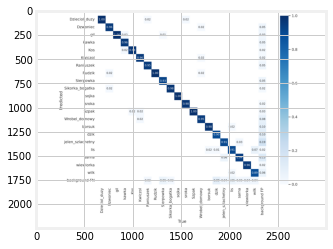

In [ ]:
image = plt.imread('/content/working/yolov5/runs/train/animal_det_b64e30_yolov5s.pt/confusion_matrix.png')
plt.imshow(image)
plt.show() 

In [ ]:
train_runs_path

'/content/working/yolov5/runs/train'

In [ ]:
# get a list of detect experiments
exp_list = os.listdir(detect_runs_path )

detect_exp = exp_list

detect_exp

['animal_det_b64e15_yolov5s.pt']

In [ ]:
runs_path = os.path.join(detect_runs_path, detect_exp[0])

pred_list = os.listdir( os.path.join( detect_runs_path, detect_exp[0]))

show_img(
         runs_path=runs_path,
         results_dir_list=pred_list,
         nrows=8, ncols=8
         )

plt.show()

### b16e85_yolov5s

In [ ]:
b16e85_runs_path = os.path.join(detect_runs_path, detect_exp[5])
pred_list = os.listdir(f'runs/detect/{detect_exp[5]}')

show_img(
         runs_path=b16e85_runs_path,
         results_dir_list=pred_list,
         nrows=5, ncols=4
         )

Output hidden; open in https://colab.research.google.com to view.

### b08e85_yolov5s

In [ ]:
detect_runs_path = '/content/working/yolov5/runs/detect/'


b08e85_runs_path = os.path.join(detect_runs_path, detect_exp[1])
pred_list = os.listdir(f'runs/detect/{detect_exp[1]}')

show_img(
         runs_path=b08e85_runs_path,
         results_dir_list=pred_list,
         nrows=5, ncols=4
         )



Output hidden; open in https://colab.research.google.com to view.

## Test on other data

In [24]:
my_test_dir = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data'

In [18]:
best_weights

'/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'

In [ ]:
results_dir

'animal_det_b64e10_yolov5s.pt'

In [20]:
!pwd

/content/working/yolov5


In [21]:
video1 = os.path.join(my_test_dir, 'Dziki_wilki_i_jelenie.mp4' )


!python detect.py --source '$video1'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Dziki_wilki_i_jelenie.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
video 1/1 (1/3771) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Dziki_wilki_i_jelenie.mp4: 384x640 1 dzik, Done. (0.031s)
video 1/1 (2/3771) /content

In [22]:
img1 = os.path.join(my_test_dir, 'wiew.jpg' )

!python detect.py --source '$img1'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 3

detect: weights=['/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/wiew.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/wiew.jpg: 384x640 1 wiewiorka, Done. (0.018s)
Speed: 0.6ms pre-process, 18.3ms inference, 1.3ms NMS per image a

In [ ]:
squirrel_img = os.path.join( my_test_dir, results_dir + '3', 'wiew.jpg')

show_img(img_path=squirrel_img, size=(8,8))

In [23]:
img2 = os.path.join(my_test_dir, '20180413_151630.jpg' ) 

!python detect.py --source '$img2'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/20180413_151630.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/20180413_151630.jpg: 384x640 Done. (0.020s)
Speed: 0.6ms pre-process, 20.2ms inference, 0.8ms NMS pe

In [ ]:
roe_deer_img = os.path.join( detect_runs_path, results_dir + '1', '20180413_151630.jpg')

show_img(img_path=roe_deer_img, size=(8,8))

In [25]:
img3  = os.path.join(my_test_dir, "20210602_144310.jpg")
img4 = os.path.join(my_test_dir, "20210602_144422.jpg")
img5 = os.path.join(my_test_dir, "20210701_171903.jpg")
img6 = os.path.join(my_test_dir, "20210701_171912.mp4")


src_path_list = [ img3, img4, img5, img6]

In [26]:
for scr_path in src_path_list:
  !python detect.py --source {scr_path}  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2
  print()


# !python detect.py --source '$img3'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2
# print()
# !python detect.py --source '$img4'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2
# print()
# !python detect.py --source '$img5'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2
# print()
# !python detect.py --source '$img6'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/20210602_144310.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/20210602_144310.jpg: 480x640 Done. (0.017s)
Speed: 0.6ms pre-process, 16.9ms inference, 0.3ms NMS pe

In [35]:
best_weights

'/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'

In [36]:
video2 = os.path.join(my_test_dir, "Ptaki_w_karmniku.mp4") 

!python detect.py --source '$video2' --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 1

Streaming output truncated to the last 5000 lines.
video 1/1 (3459/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Ptaki_w_karmniku.mp4: 384x640 2 gils, 1 sroka, Done. (0.011s)
video 1/1 (3460/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Ptaki_w_karmniku.mp4: 384x640 1 gil, 3 Sikorka_bogatkas, Done. (0.011s)
video 1/1 (3461/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Ptaki_w_karmniku.mp4: 384x640 2 gils, 2 Sikorka_bogatkas, 1 sroka, Done. (0.012s)
video 1/1 (3462/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Ptaki_w_karmniku.mp4: 384x640 1 gil, 1 Sikorka_bogatka, 1 sroka, Done. (0.011s)
video 1/1 (3463/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Ptaki_w_karmniku.mp4: 384x640 1 gil, 1 kawka, 1 Sikorka_bogatka, 1 sroka, Done. (0.011s)
video 1/1 (3464/8456) /content/drive/MyDrive/ColabNotebooks/Projects/

In [37]:
video3 = os.path.join(my_test_dir, "Jakie_ptaki_odwiedzają_karmnik.mp4") 

!python detect.py --source '$video3' --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2

Streaming output truncated to the last 5000 lines.
video 1/1 (1285/6282) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Jakie_ptaki_odwiedzają_karmnik.mp4: 480x640 1 Sikorka_bogatka, 1 borsuk, Done. (0.011s)
video 1/1 (1286/6282) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Jakie_ptaki_odwiedzają_karmnik.mp4: 480x640 1 Sikorka_bogatka, 1 borsuk, Done. (0.012s)
video 1/1 (1287/6282) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Jakie_ptaki_odwiedzają_karmnik.mp4: 480x640 1 borsuk, Done. (0.011s)
video 1/1 (1288/6282) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Jakie_ptaki_odwiedzają_karmnik.mp4: 480x640 1 borsuk, Done. (0.011s)
video 1/1 (1289/6282) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/Jakie_ptaki_odwiedzają_karmnik.mp4: 480x640 1 borsuk, Done. (0.011s)
video 1/1 (1290/6282) /content/drive/MyDrive/ColabNotebooks/Projec

In [42]:
video4 = os.path.join(my_test_dir, "wilk_na_gorze.mp4")

!python detect.py --source '$video4'  --weights '$best_weights' --conf 0.25 --name '$results_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/armind93/AnimalsDetection_YoloV5/animal_det_b64e30_yolov5s.pt/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/wilk_na_gorze.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b64e30_yolov5s.pt, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 16.0 GFLOPs
video 1/1 (1/596) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data/wilk_na_gorze.mp4: 384x640 Done. (0.020s)
video 1/1 (2/596) /content/drive/MyDrive/ColabNotebo

# Make archive

In [44]:
my_test_dir

'/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/my_test_data'

In [45]:
dir_name = '/content/working/yolov5/runs' # '/content/working/yolov5/artifacts'
output_filename =  "/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/animal_det_07062022"#result_dir

shutil.make_archive(output_filename, 'zip', dir_name, )

'/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/animal_det_05062022.zip'